In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm


#$Gain(S,A) = H(S) - \sum_v\frac{|S_v|}{|S|} H(S_v)$

#Algorithm 1
**Coordinate Descent with Line Search**

Require: Starting point $x_0$, Stopping tolerance τ

1: Initialize k = 0


2: while $∥∇f(x_k)∥_2 > τ$ do

3: Choose a random coordinate i

4: Perform line search to find step size $η_K^{(i)}$

5: Update $ x_{k+1}^{(i)} = x_k^(i) -  n_k^{(i)} \frac{∂f}{∂x^{(i)}} (x_k)$

6: k = k + 1

7: Output: $x_k$


#Algorithm 2
**Proximal Gradient Descent**

Require: Initial point x0, step size η > 0, regularization parameter λ > 0, maximum iterations T


1: Initialize t = 0

2: while t < T do

3: Compute gradient $∇f(x_t)$

4: Update $y_t = x_t − η∇f(x_t)$

5: Compute proximity operator: $x_{t+1} = prox_{λg}(y_t)$ ▷ Proximity operator of g with
parameter λ

6: t = t + 1

7: Output:$ x_t$

#Proximity operator of g with parameter λ can be defined as:

$prox_{λg}(y) = arg min_{x∈R^d}(g(x) + \frac{1}{12λ}∥y − x∥^2)$



**1. What is the minimizer and minimum function value of f(x) ?, Is the minimizer unique ?, Is it local or global
minima ?, Are the functions f(x) and g(x) convex ?, explain each of them**

**Minimizer**: The function is minimized when
$x_1+2x_2 = 0$, and any point on the line $x_1 = -2x_2$

  is a minimizer. The minimum function value is 0.

**Uniqueness of Minimizer**: The minimizer is not unique, as any point on the line
$x_1 = -2x_2$

 minimizes the function.

**Global Minima**: The function achieves its minimum value of 0 globally, so it is a global minimum.

**Convexity**:


$\textbf{1.}$ $f(x)= (x_1+2x_2)^2$
  is convex, as it is a quadratic function and all quadratic functions are convex.

$\textbf{2.}$ g(x) can be considered convex in the context of convex optimization due to the convexity of its epigraph, even though it is not a continuous function. The epigraph of
g(x) consists of convex regions, leading to its considered convexity.**

**2. Can you implement Algorithm 1 of this lab using Algorithm 1 of Lab 03 ?, Can you come up with a
useful choice for $D_k$ ?, Does $D_k$ satisfies the condition of being PSD or PD ?, Implement all this for function f(x), With starting point $x_0 = (1, 40)$ and $τ = 10^{-12}$, we will now study the behavior of coordinate
descent algorithm with backtracking line search, for different choices of ρ. Take α = 1, γ = 0.5. Try
ρ ∈ {0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.For each ρ, record the final minimizer, final objective function
value and number of iterations to terminate, for the coordinate descent algorithm with backtracking line search.
Prepare a plot where the number of iterations for the algorithm are plotted against ρ values. Use different
colors and a legend to distinguish the plots. Comment on the observations. Comment about the minimizers and objective function values obtained for different choices of the ρ values. Plot the level sets of the function
f(x) and also plot the trajectory of the optimization on the same plot and report your observations. Explain
the differences (you may try to implement Algorithm 1 of this lab as well !!) between Algorithm 1 of this
lab and Algorithm 1 of Lab 03 and explain which is superior over other and when ?**

 $f(x) = f(x_1, x_2) = x_1^2+ 4x_1x_2 + 4x_2^2.$

In [ ]:
def f(x):
  return x[0]**2 +4*x[0]*x[1] + 4*x[1]**2

def grad_f(x):
  return np.array([2*x[0]+4*x[1] , 8*x[1]+4*x[0]])


In [ ]:
def get_alpha_with_scaling(x, alpha0, rho, gamma, D):
  alpha = alpha0
  p = -grad_f(x)
  while f(x + alpha*D @p) > (f(x) + gamma*alpha*grad_f(x)@ D @p):
    alpha = rho*alpha
  return alpha

def coordinate_descent(x0,tolerance,alpha, rho, gamma):
  x = np.copy(x0)
  x1 = []
  x1.append(x0)
  k = 0

  while np.linalg.norm(grad_f(x)) > tolerance:
    i = np.random.randint(len(x))
    Dk = np.zeros((len(x),len(x)))
    Dk[i,i] = 1.
    eta = get_alpha_with_scaling(x, alpha, rho, gamma, Dk)
    x = x-eta*Dk@grad_f(x)
    # x[i] = x[i] - eta  *grad_f(x)[i]
    k = k+1
    x1.append(x)

  return k,x,x1,f(x)

--------------------------------------------------------------------------
Row 0.9
Iterations =  6
Minimizer =  [-76.58038664  38.29019349]
Final value =  9.094947017729282e-13


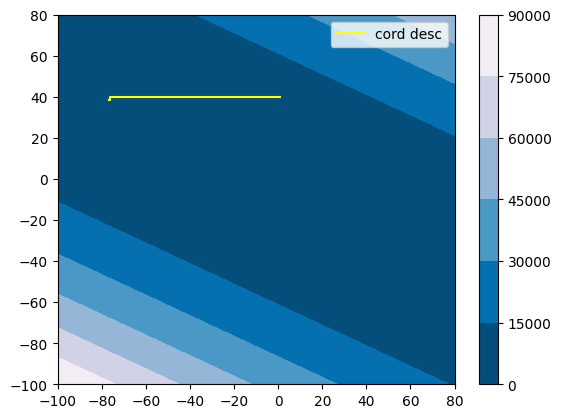

--------------------------------------------------------------------------
Row 0.8
Iterations =  10
Minimizer =  [-77.35224029  38.67612049]
Final value =  9.094947017729282e-13


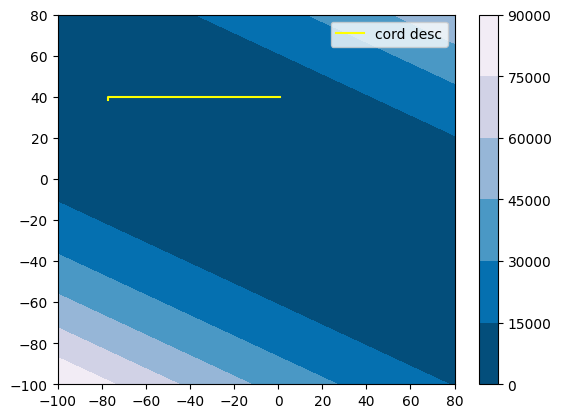

--------------------------------------------------------------------------
Row 0.75
Iterations =  10
Minimizer =  [-78.36532935  39.1826656 ]
Final value =  2.7284841053187847e-12


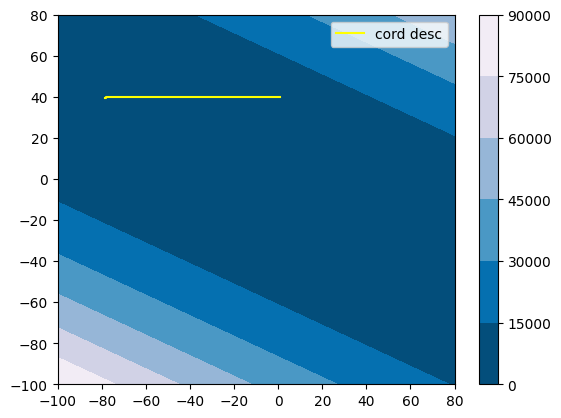

--------------------------------------------------------------------------
Row 0.6
Iterations =  17
Minimizer =  [-7.3542919   3.67714639]
Final value =  7.673861546209082e-13


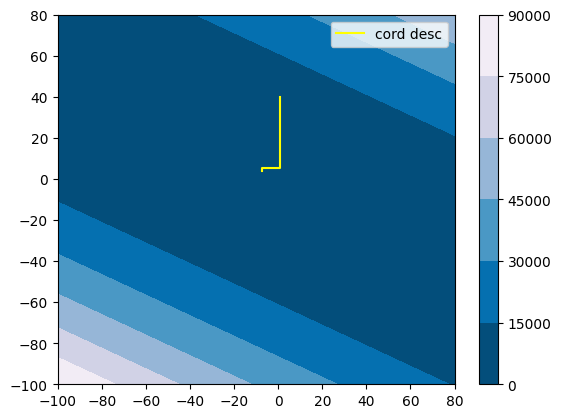

--------------------------------------------------------------------------
Row 0.5
Iterations =  1
Minimizer =  [-80.  40.]
Final value =  0.0


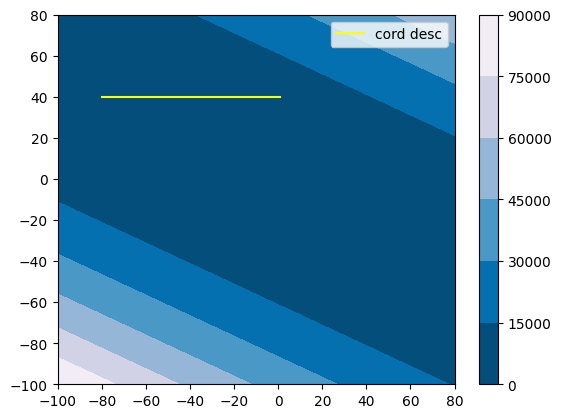

--------------------------------------------------------------------------
Row 0.4
Iterations =  15
Minimizer =  [-65.39578311  32.69789224]
Final value =  2.7284841053187847e-12


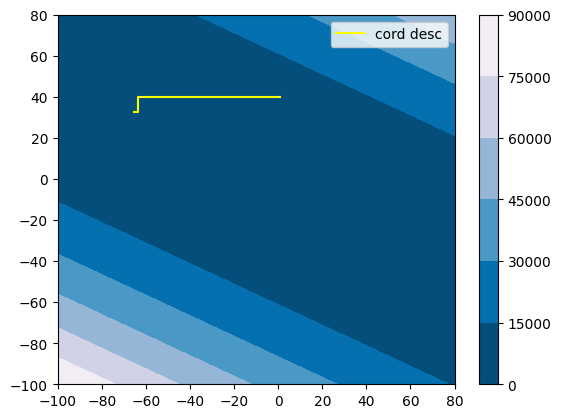

--------------------------------------------------------------------------
Row 0.25
Iterations =  26
Minimizer =  [-5.00722028  2.50361075]
Final value =  1.4566126083082054e-12


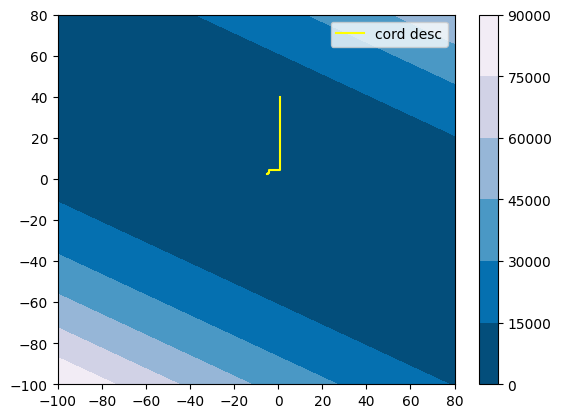

--------------------------------------------------------------------------
Row 0.1
Iterations =  21
Minimizer =  [-28.90907036  14.45453554]
Final value =  5.684341886080801e-13


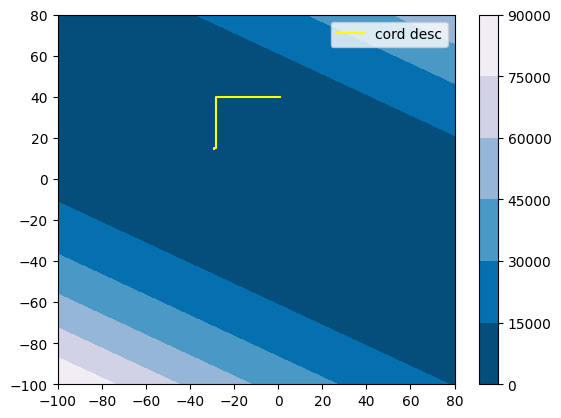

--------------------------------------------------------------------------
Row 0.01
Iterations =  346
Minimizer =  [-18.1532511    9.07662666]
Final value =  4.945377440890297e-12


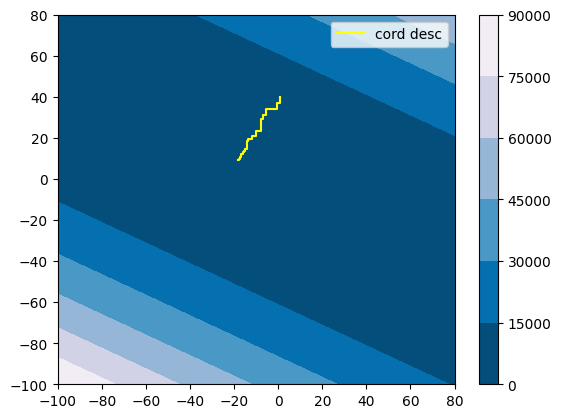

In [ ]:
# Initializations
x0 = np.array([1.,40.])
alpha = 1
gamma =0.5
rows = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

tolerance = 10**(-5)
iteration = []
for row in rows:
   iterations,minimizer,x1,final_value = coordinate_descent(x0,tolerance,alpha,row, gamma)
   iteration.append(iterations)
   print('--------------------------------------------------------------------------')
   print('Row',row)
   print('Iterations = ',iterations)
   print('Minimizer = ',minimizer)
   print('Final value = ',final_value)

   # level sets and trajectory

   x = np.linspace(-100, 80, 1000)
   y = np.linspace(-100, 80, 1000)
   X, Y = np.meshgrid(x, y)
   Z = f((X,Y))
   p = plt.contourf(X,Y,Z,cmap=cm.PuBu_r)
   cbar = plt.colorbar(p)

   xcordinates1 = [xk1[0] for xk1 in x1]
   ycordinates1 = [xk1[1] for xk1 in x1]
   plt.plot(xcordinates1, ycordinates1, color='yellow', label = 'cord desc')

   plt.legend()
   plt.show()

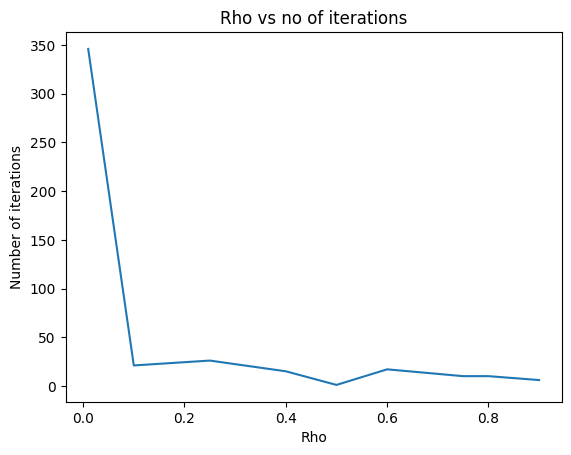

In [ ]:
plt.plot(rows,iteration)
plt.xlabel("Rho")
plt.ylabel("Number of iterations")
plt.title("Rho vs no of iterations")
plt.show()

# OBSERVATION
It is seen from the line plot that the number of iterations is within the range 1 and 26. But when we choose our rho value to be 0.01 , the number of iterations increased to 346.
Also as compared to gradient descent with scaling, this method takes less number of iterations to compute the minimum as it updates only one coordinate at a time. As such it becomes more efficient when the dimensionality is high.

**3. Consider any general function h(y) $(y ∈ R_d)$, denote its linearization around a fixed point x by t(y). Evaluate
proxλt(x). What is the result ?, Is the result that you got looks familiar to you ? Explain in detail**

To evaluate proxλt(x), where t(y) is the linearization of a function h(y) around a fixed point x, we need to find the proximal operator of t with parameter λ. The proximal operator of t with parameter λ is defined as:

$prox_{λt}(x) = arg min_{y∈R^d} { t(y) + \frac{1}{2λ}||y - x||^2 }$

Since t(y) is the linearization of h(y) around x, we can write it as:

$t(y) = h(x) + ⟨∇h(x), y - x⟩$

where ⟨., .⟩ denotes the dot product. Substituting this into the definition of proxλt(x), we get:

$proxλt(x) = arg min_{y∈R^d} { h(x) + ⟨∇h(x), y - x⟩ +\frac{1}{2λ}||y - x||^2 }$

=> $prox_{λt}(x) = arg min_{y∈R^d} { h(x) + ⟨∇h(x), y - x⟩ +\frac{1}{2λ} (||y||^2 - 2⟨y, x⟩ + ||x||^2) }$

Since $||x||^2$ and h(x) are constants with respect to y in this minimization problem, we can ignore them. Also, the term $\frac{1}{2λ}||y||^2$ does not depend on y and can be treated as a constant. Thus, the minimization problem becomes:

$proxλt(x) = arg min_{y∈R^d} { ⟨∇h(x), y - x⟩ + \frac{1}{2λ}||y||^2 - \frac{1}{λ} ⟨y, x⟩ }$

To find the minimizer y*, we can take the derivative of the objective function with respect to y and set it to zero:

$∇(⟨∇h(x), y - x⟩ + \frac{1}{2λ}||y||^2 - \frac{1}{λ} ⟨y, x⟩) = 0$

Simplifying, we get:

$∇(⟨∇h(x), y⟩ - ⟨∇h(x), x⟩ + \frac{1}{2λ} ||y||^2 - \frac{1}{λ} ⟨y, x⟩) = 0$
$∇(⟨∇h(x), y⟩ + \frac{1}{2λ} ||y||^2 - ⟨∇h(x), x⟩ - \frac{1}{λ} ⟨y, x⟩) = 0$

Using the fact that ∇⟨a, b⟩ = a for any constant vector a and differentiable function b, and $∇||y||^2 = 2y$, we can simplify further:

$∇(⟨∇h(x), y⟩ +  \frac{1}{2λ} ||y||^2 - ⟨∇h(x), x⟩ -\frac{1}{λ} ⟨y, x⟩) = ∇⟨∇h(x), y⟩ + \frac{1}{λ} x - ⟨∇h(x), x⟩ - \frac{1}{λ} x = 0$

Rearranging terms, we get:

$∇⟨∇h(x), y⟩ +  \frac{1}{λ} (x - y) = 0$

This is a linear equation in y. Solving for y, we get:

$y* = x - λ∇h(x)$

This is the minimizer of the proximal operator $prox_{λt}(x)$. It is interesting to note that this result is similar to the update step in the proximal gradient descent algorithm, where we update the current iterate x by subtracting λ times the gradient of the function at x. The proximity operator captures the essence of this update step by finding the point that minimizes the function plus a quadratic penalty term that penalizes the distance from the current point x.

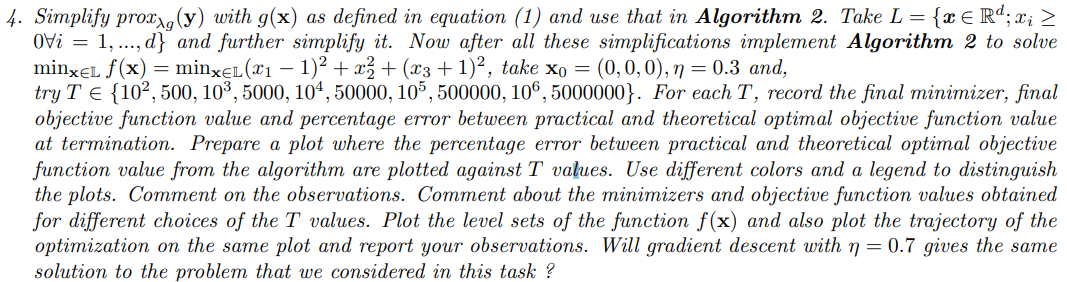

In [ ]:
from numpy.linalg import norm
from numpy import ma

def f1(x):

  return (x[0]-1)**2 + x[1]**2 + (x[2]+1)**2

def gradient_f1(x):
  return np.array([2*(x[0]-1), 2*x[1],2*(x[2]+1)])

def prox(x):
  ys=[]
  for x in x:
    if x<0:
      y=0
    else:
      y=x
    ys.append(y)
  return ys

alpha=0.3

def gradient_descent_with_backtracking_with_scaling(x0, T):
  x = np.copy(x0)
  count = 0
  pk = -1*gradient_f1(x)
  xs = []
  xs.append(x)
  while count<rho:
    pk = -1*gradient_f1(x)
    x = x + alpha*pk
    x=prox(x)

    xs.append(x)
    count += 1
  return count, x, f1(x), xs

In [ ]:
alpha = 0.3
T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
x0 = np.array([0,0,0])
for rho in T:
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking_with_scaling(x0, T)
  print('----------------------------------------------------------------------------------------')
  print("for rho = ",rho)
  print("iteration = ",count2)
  print("minimizer is = ",final_xk2)
  print("and Minimum value is = ",final_val2)

----------------------------------------------------------------------------------------
for rho =  100
iteration =  100
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
for rho =  500
iteration =  500
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
for rho =  1000
iteration =  1000
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
for rho =  5000
iteration =  5000
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
for rho =  10000
iteration =  10000
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
for rho 

## for eta = 0.7


In [ ]:
def gradient_descent_with_backtracking1(x0, T):
  x = np.copy(x0)
  count = 0
  pk = -1*gradient_f1(x)
  xs = []
  xs.append(x)
  while count<rho:
    alpha = 0.7
    pk = -1*gradient_f1(x)
    x = x + alpha*pk
    x=prox(x)

    xs.append(x)
    count += 1
  return count, x, f1(x), xs

T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
x0 = np.array([0,0,0])

for rho in T:
  count,minimizer,final_val,xks = gradient_descent_with_backtracking1(x0,rho)
  print('----------------------------------------------------------------------------------------')
  print("iteration = ",count)
  print("minimizer is = ",minimizer)
  print("and Minimum value is = ",final_val)

----------------------------------------------------------------------------------------
iteration =  100
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
iteration =  500
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
iteration =  1000
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
iteration =  5000
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
iteration =  10000
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------------------------------------------------------------------------------------
iteration =  50000
minimizer is =  [1.0, 0.0, 0]
and Minimum value is =  1.0
----------

###OBSEVATION
Here it is seen that the minimum value does not change when we change eta from 0.3 to 0.7


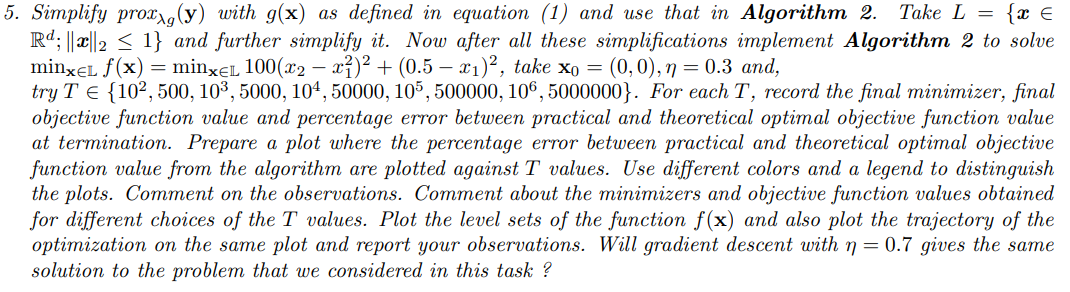

### For eta = 0.3

In [ ]:
from numpy.linalg import norm

def f2(x):
  return 100*(x[1]-x[0]**2)**2 + (0.5 - x[0])**2

def grad_f2(x):
  return np.array([-400*x[0]*(x[1]-x[0]**2) - 2*(0.5 - x[0]),200*(x[1]-x[0]**2)])


def prox(x):

  if norm(x)<=1:
    yt=x
    return yt
  else:
    yt=x/norm(x)
    return  yt


def gradient_descent_with_backtracking(x0, T):
  x = np.copy(x0)
  alpha=0.3
  count = 0
  pk = -1*grad_f2(x)
  xs = []
  xs.append(x)
  while count<rho:
    pk = -1*grad_f2(x)
    x = x + alpha*pk
    x=prox(x)
    xs.append(x)
    count += 1
  return count, x, f2(x), xs


----------------------------------------------------------------------------------------
iteration =  100
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121
[0.0, 0.3, -0.4629025659112393, -0.6863373539269346, 0.8111688563983054, -0.7940141077026799, 0.7359083772218663, 0.8599920113975924, -0.864902794255385, 0.8579365863270593, -0.8488583118423646, 0.850925368348342, -0.8447714401308144, 0.8488548474434042, -0.8434554401903638, 0.8481551281739946, -0.8429977158092269, 0.8479076249032012, -0.8428341632416859, 0.8478186543021551, -0.8427751567554993, 0.8477864857576098, -0.842753794146355, 0.8477748303577055, -0.8427460503058459, 0.847770604129176, -0.8427432419184974, 0.8477690712834602, -0.8427422232576665, 0.8477685152674272, -0.84274185374586, 0.8477683135739148, -0.8427417197052165, 0.8477682404091037, -0.8427416710815031, 0.8477682138682645, -0.8427416534430298, 0.8477682042404481, -0.8427416470445867, 0.8477682007479095, -0.842741644723519, 0.847768199480

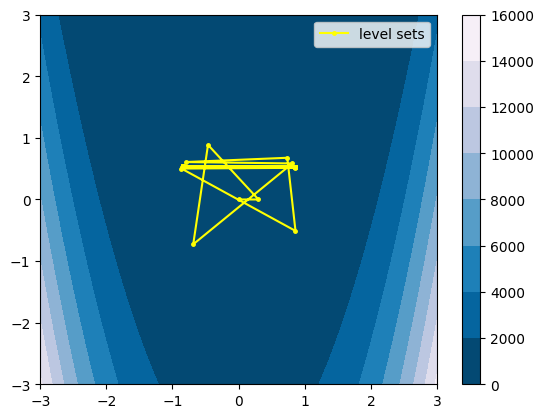

----------------------------------------------------------------------------------------
iteration =  500
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121
[0.0, 0.3, -0.4629025659112393, -0.6863373539269346, 0.8111688563983054, -0.7940141077026799, 0.7359083772218663, 0.8599920113975924, -0.864902794255385, 0.8579365863270593, -0.8488583118423646, 0.850925368348342, -0.8447714401308144, 0.8488548474434042, -0.8434554401903638, 0.8481551281739946, -0.8429977158092269, 0.8479076249032012, -0.8428341632416859, 0.8478186543021551, -0.8427751567554993, 0.8477864857576098, -0.842753794146355, 0.8477748303577055, -0.8427460503058459, 0.847770604129176, -0.8427432419184974, 0.8477690712834602, -0.8427422232576665, 0.8477685152674272, -0.84274185374586, 0.8477683135739148, -0.8427417197052165, 0.8477682404091037, -0.8427416710815031, 0.8477682138682645, -0.8427416534430298, 0.8477682042404481, -0.8427416470445867, 0.8477682007479095, -0.842741644723519, 0.847768199480

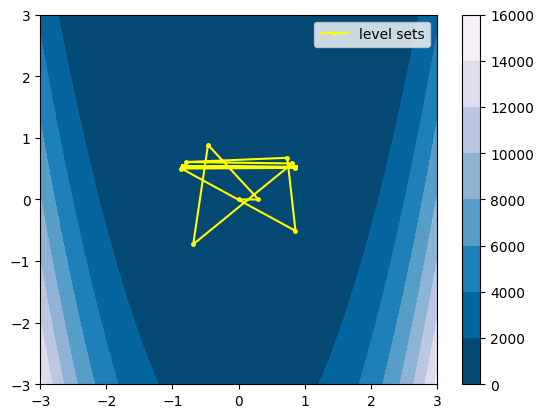

----------------------------------------------------------------------------------------
iteration =  1000
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121
[0.0, 0.3, -0.4629025659112393, -0.6863373539269346, 0.8111688563983054, -0.7940141077026799, 0.7359083772218663, 0.8599920113975924, -0.864902794255385, 0.8579365863270593, -0.8488583118423646, 0.850925368348342, -0.8447714401308144, 0.8488548474434042, -0.8434554401903638, 0.8481551281739946, -0.8429977158092269, 0.8479076249032012, -0.8428341632416859, 0.8478186543021551, -0.8427751567554993, 0.8477864857576098, -0.842753794146355, 0.8477748303577055, -0.8427460503058459, 0.847770604129176, -0.8427432419184974, 0.8477690712834602, -0.8427422232576665, 0.8477685152674272, -0.84274185374586, 0.8477683135739148, -0.8427417197052165, 0.8477682404091037, -0.8427416710815031, 0.8477682138682645, -0.8427416534430298, 0.8477682042404481, -0.8427416470445867, 0.8477682007479095, -0.842741644723519, 0.84776819948

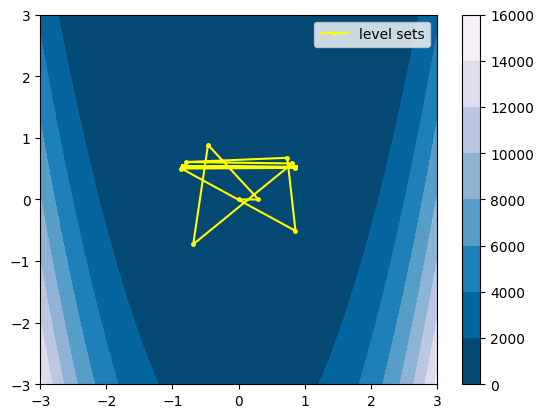

----------------------------------------------------------------------------------------
iteration =  5000
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121
[0.0, 0.3, -0.4629025659112393, -0.6863373539269346, 0.8111688563983054, -0.7940141077026799, 0.7359083772218663, 0.8599920113975924, -0.864902794255385, 0.8579365863270593, -0.8488583118423646, 0.850925368348342, -0.8447714401308144, 0.8488548474434042, -0.8434554401903638, 0.8481551281739946, -0.8429977158092269, 0.8479076249032012, -0.8428341632416859, 0.8478186543021551, -0.8427751567554993, 0.8477864857576098, -0.842753794146355, 0.8477748303577055, -0.8427460503058459, 0.847770604129176, -0.8427432419184974, 0.8477690712834602, -0.8427422232576665, 0.8477685152674272, -0.84274185374586, 0.8477683135739148, -0.8427417197052165, 0.8477682404091037, -0.8427416710815031, 0.8477682138682645, -0.8427416534430298, 0.8477682042404481, -0.8427416470445867, 0.8477682007479095, -0.842741644723519, 0.84776819948

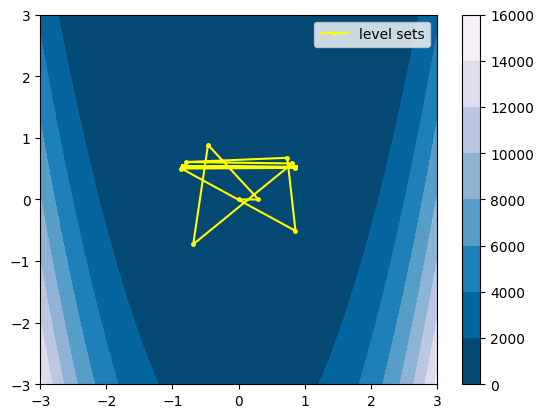

----------------------------------------------------------------------------------------
iteration =  10000
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121
[0.0, 0.3, -0.4629025659112393, -0.6863373539269346, 0.8111688563983054, -0.7940141077026799, 0.7359083772218663, 0.8599920113975924, -0.864902794255385, 0.8579365863270593, -0.8488583118423646, 0.850925368348342, -0.8447714401308144, 0.8488548474434042, -0.8434554401903638, 0.8481551281739946, -0.8429977158092269, 0.8479076249032012, -0.8428341632416859, 0.8478186543021551, -0.8427751567554993, 0.8477864857576098, -0.842753794146355, 0.8477748303577055, -0.8427460503058459, 0.847770604129176, -0.8427432419184974, 0.8477690712834602, -0.8427422232576665, 0.8477685152674272, -0.84274185374586, 0.8477683135739148, -0.8427417197052165, 0.8477682404091037, -0.8427416710815031, 0.8477682138682645, -0.8427416534430298, 0.8477682042404481, -0.8427416470445867, 0.8477682007479095, -0.842741644723519, 0.8477681994

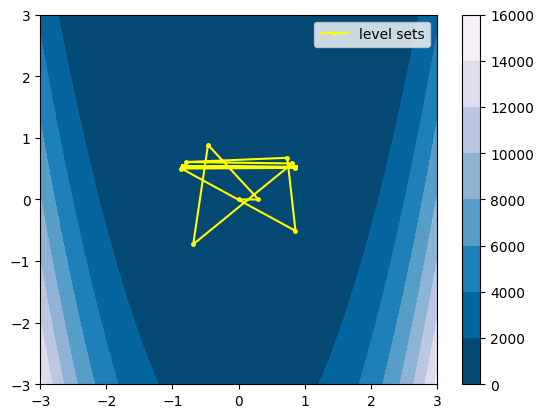

----------------------------------------------------------------------------------------
iteration =  50000
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121
[0.0, 0.3, -0.4629025659112393, -0.6863373539269346, 0.8111688563983054, -0.7940141077026799, 0.7359083772218663, 0.8599920113975924, -0.864902794255385, 0.8579365863270593, -0.8488583118423646, 0.850925368348342, -0.8447714401308144, 0.8488548474434042, -0.8434554401903638, 0.8481551281739946, -0.8429977158092269, 0.8479076249032012, -0.8428341632416859, 0.8478186543021551, -0.8427751567554993, 0.8477864857576098, -0.842753794146355, 0.8477748303577055, -0.8427460503058459, 0.847770604129176, -0.8427432419184974, 0.8477690712834602, -0.8427422232576665, 0.8477685152674272, -0.84274185374586, 0.8477683135739148, -0.8427417197052165, 0.8477682404091037, -0.8427416710815031, 0.8477682138682645, -0.8427416534430298, 0.8477682042404481, -0.8427416470445867, 0.8477682007479095, -0.842741644723519, 0.8477681994

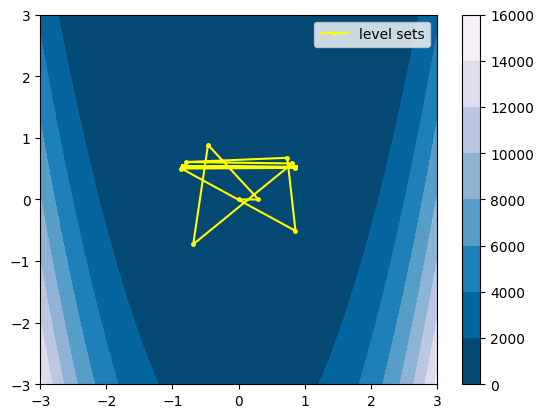

----------------------------------------------------------------------------------------
iteration =  100000
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



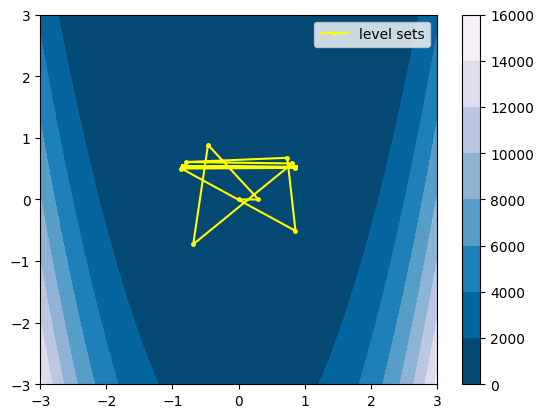

----------------------------------------------------------------------------------------
iteration =  500000
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



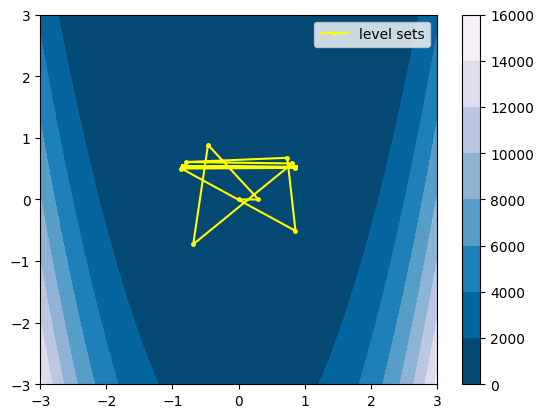

----------------------------------------------------------------------------------------
iteration =  1000000
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



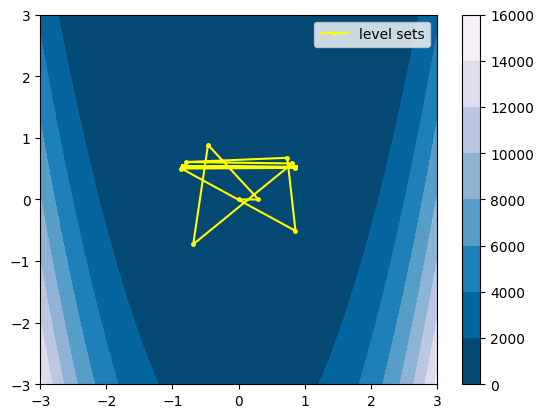

----------------------------------------------------------------------------------------
iteration =  5000000
minimizer is =  4.757752550249121
and Minimum value is =  4.757752550249121


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



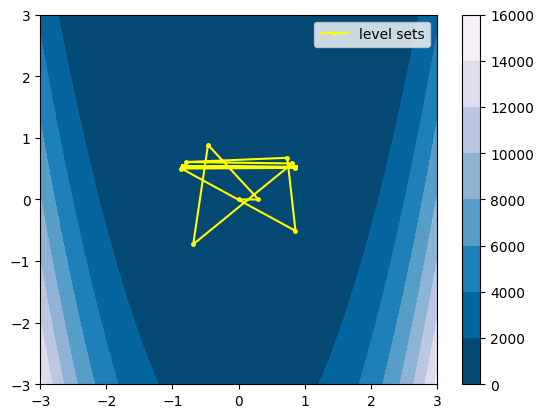

In [ ]:
x0 = np.array([0.,0.])
T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
for rho in T:
  count3,minimizer3,final_val3,xks3 = gradient_descent_with_backtracking(x0,rho)
  print('----------------------------------------------------------------------------------------')
  print("iteration = ",count3)
  print("minimizer is = ",final_val3)
  print("and Minimum value is = ",final_val3)

   # level sets and trajectory

  x = np.linspace(-3, 3, 1000)
  y = np.linspace(-3, 3, 1000)
  X, Y = np.meshgrid(x, y)
  Z = f2((X,Y))
  p = plt.contourf(X,Y,Z,cmap=cm.PuBu_r)
  cbar = plt.colorbar(p)

  xcordinates1 = [xk1[0] for xk1 in xks3]
  ycordinates1 = [xk1[1] for xk1 in xks3]
  print(xcordinates1)
  plt.plot(xcordinates1, ycordinates1, color='yellow' ,marker = '.', markersize = 5, label = 'level sets')

  plt.legend()
  plt.show()

### For eta = 0.7

In [ ]:
def gradient_descent_with_backtracking(x0, T):
  x = np.copy(x0)
  alpha=0.7
  count = 0
  pk = -1*grad_f2(x)
  xs = []
  xs.append(x)
  while count<rho:
    pk = -1*grad_f2(x)
    x = x + alpha*pk
    x=prox(x)
    xs.append(x)
    count += 1
  return count, x, f2(x), xs


In [ ]:
x0 = np.array([0.,0.])
T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
for rho in T:
  count4,minimizer4,final_val4,xks4 = gradient_descent_with_backtracking(x0,rho)
  print('----------------------------------------------------------------------------------------')
  print("iteration = ",count4)
  print("minimizer is = ",final_val4)
  print("and Minimum value is = ",final_val4)

   # level sets and trajectory

  x = np.linspace(-3, 3, 1000)
  y = np.linspace(-3, 3, 1000)
  X, Y = np.meshgrid(x, y)
  Z = f2((X,Y))
  p = plt.contourf(X,Y,Z,cmap=cm.PuBu_r)
  cbar = plt.colorbar(p)

  xcordinates1 = [xk1[0] for xk1 in xks4]
  ycordinates1 = [xk1[1] for xk1 in xks4]
  print(xcordinates1)
  plt.plot(xcordinates1, ycordinates1, color='yellow',marker = '.', markersize = 5, label = 'level sets')

  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## OBSERVATION
It is seen that, for both etas, we donot get the same minimum. We get a better minimum using eta = 0.3 as compared to that of eta = 0.7. Also in both the cases even after increasing the number of iterations, we donot get a different minimum value of the function
